## 双y轴绘制及合并图例
### 双y轴绘制 关键函数：twinx()

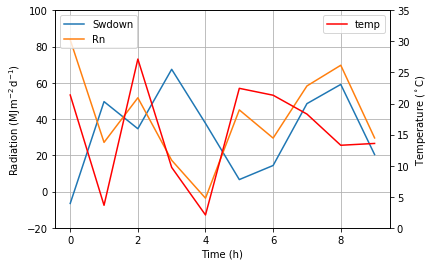

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('mathtext', default='regular')

time = np.arange(10)
temp = np.random.random(10)*30
Swdown = np.random.random(10)*100-10
Rn = np.random.random(10)*100-10

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, Swdown, '-', label = 'Swdown')
ax.plot(time, Rn, '-', label = 'Rn')
ax2 = ax.twinx()
ax2.plot(time, temp, '-r', label = 'temp')
ax.legend(loc=2)
ax.grid()
ax.set_xlabel("Time (h)")
ax.set_ylabel(r"Radiation ($MJ\,m^{-2}\,d^{-1}$)")
ax2.set_ylabel(r"Temperature ($^\circ$C)")
ax2.set_ylim(0, 35)
ax.set_ylim(-20,100)
ax2.legend(loc=0)
plt.savefig('0.png')

## 合并图例
### 仅使用一个轴的legend()函数

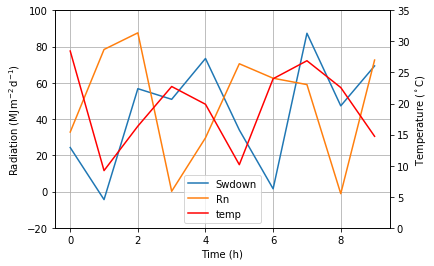

In [3]:
rc('mathtext', default='regular')

time = np.arange(10)
temp = np.random.random(10)*30
Swdown = np.random.random(10)*100-10
Rn = np.random.random(10)*100-10

fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.plot(time, Swdown, '-', label = 'Swdown')
lns2 = ax.plot(time, Rn, '-', label = 'Rn')
ax2 = ax.twinx()
lns3 = ax2.plot(time, temp, '-r', label = 'temp')

# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel("Time (h)")
ax.set_ylabel(r"Radiation ($MJ\,m^{-2}\,d^{-1}$)")
ax2.set_ylabel(r"Temperature ($^\circ$C)")
ax2.set_ylim(0, 35)
ax.set_ylim(-20,100)
plt.savefig('0.png')

### 使用figure.legend()

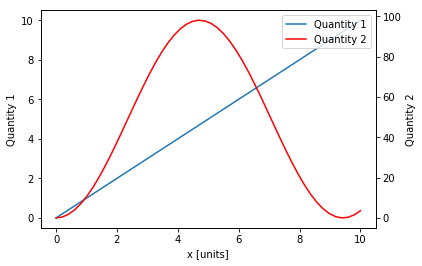

In [4]:
x = np.linspace(0,10)
y = np.linspace(0,10)
z = np.sin(x/3)**2*98

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, '-', label = 'Quantity 1')

ax2 = ax.twinx()
ax2.plot(x,z, '-r', label = 'Quantity 2')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

ax.set_xlabel("x [units]")
ax.set_ylabel(r"Quantity 1")
ax2.set_ylabel(r"Quantity 2")

plt.savefig('0.png')

## matplotlib绘制多个图形单独显示

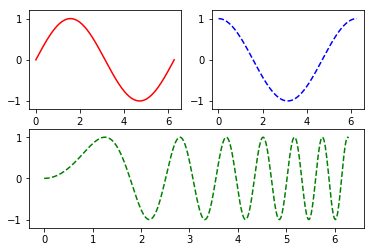

In [5]:
#创建自变量数组
x= np.linspace(0,2*np.pi,500)
#创建函数值数组
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x*x)
#创建图形
plt.figure(1)
'''
意思是在一个2行2列共4个子图的图中，定位第1个图来进行操作（画图）。
最后面那个1表示第1个子图。那个数字的变化来定位不同的子图
'''
#第一行第一列图形
ax1 = plt.subplot(2,2,1)
#第一行第二列图形
ax2 = plt.subplot(2,2,2)
#第二行
ax3 = plt.subplot(2,1,2)
#选择ax1
plt.sca(ax1)
#绘制红色曲线
plt.plot(x,y1,color='red')
#限制y坐标轴范围
plt.ylim(-1.2,1.2)
#选择ax2
plt.sca(ax2)
#绘制蓝色曲线
plt.plot(x,y2,'b--')
plt.ylim(-1.2,1.2)
#选择ax3
plt.sca(ax3)
plt.plot(x,y3,'g--')
plt.ylim(-1.2,1.2)
plt.show()

## figure图的嵌套

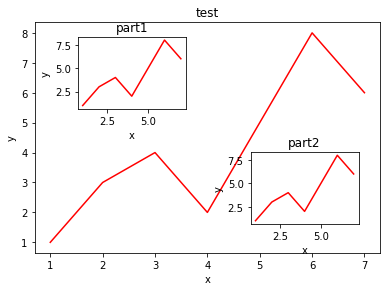

In [7]:
# 定义figure
fig = plt.figure()

# 定义数据
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 4, 2, 5, 8, 6]

# figure的百分比, 从figure 10%的位置开始绘制, 宽高是figure的80%
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
# 获得绘制的句柄
ax1 = fig.add_axes([left, bottom, width, height])
# 绘制点(x,y)
ax1.plot(x, y, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('test')


# 嵌套方法一
# figure的百分比, 从figure 10%的位置开始绘制, 宽高是figure的80%
left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
# 获得绘制的句柄
ax2 = fig.add_axes([left, bottom, width, height])
# 绘制点(x,y)
ax2.plot(x, y, 'r')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('part1')


# 嵌套方法二
plt.axes([bottom, left, width, height])
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('part2')

plt.show()

## matplotlib模块数据可视化-多图布局，分格显示
### 通过subplot2grid实现

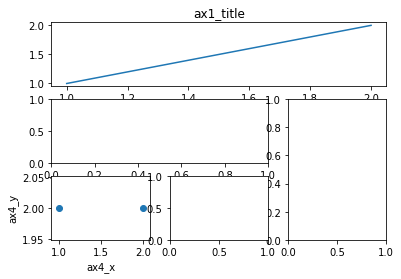

In [8]:

plt.figure()
# 通过栅格的形式创建布局方式,(3,3)创建3x3的布局形式，(0,0)绘制的位置，0行0列的位置绘制
# colspan:表示跨几列 rowspan:表示跨几行
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
# 在ax1图中绘制一条坐标(1,1)到坐标(2,2)的线段
ax1.plot([1, 2], [1, 2])
# 设置ax1的标题  现在xlim、ylim、xlabel、ylabel等所有属性现在只能通过set_属性名的方法设置
ax1.set_title('ax1_title')  # 设置小图的标题
 
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))
# 给对应的图绘制内容，这里只给ax4图绘制，属性通过set_xxx的模式设置
ax4.scatter([1, 2], [2, 2])
ax4.set_xlabel('ax4_x')
ax4.set_ylabel('ax4_y')
plt.show()


### 通过gridspec实现

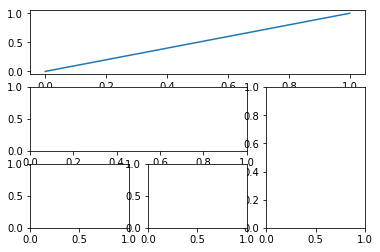

In [9]:
import matplotlib.gridspec as gridspec

plt.figure()
# 将整个视图分成3x3布局
gs = gridspec.GridSpec(3, 3)
# gs[0,:]  指定画图的位置 前面指定该图所占的行范围0表示0行，1: 表示从第一行到最后一行
# 第二个参数指定列的范围一个数表示固定列数，x:y表示从x列到y列
ax6 = plt.subplot(gs[0, :])
ax6.plot((0,1),(0,1))
# 第一行，从0列开始到2列，不包括2，也就是占0、1两列
ax7 = plt.subplot(gs[1, :2])
# 从第一行到最后，占1、2两行，后面的2表示只占用第二列，也就是最后的一列
ax8 = plt.subplot(gs[1:, 2])
# 倒数第一行，只占第0列这一列
ax9 = plt.subplot(gs[-1, 0])
# 倒数第一行，只占倒数第二列，由于总共三列，所以倒数第二列就是序号1的列
ax10 = plt.subplot(gs[-1, -2])
plt.show()

### 通过subplots实现

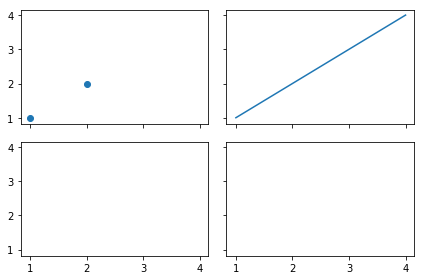

In [10]:
# 这种方法只适合列数相同的布局
# sharex:所有小图共享x轴  sharey:表示所有小图共享y轴  坐标轴以所有小图中范围最大的进行显示
f, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax11.scatter([1,2], [1,2])
ax12.plot((1,4),(1,4))
# 紧凑显示，边框会比较小，可以注释掉该行查看效果
plt.tight_layout()
plt.show()


In [ ]:
z